<a href="https://colab.research.google.com/github/zzickso/DeepLearning/blob/main/DeepLearning(21_05_12)_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #코랩 파일 드라이브에서 가져오기

Mounted at /content/drive


# 환자생존율

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
np.random.seed(3)
tf.random.set_seed(3)
df=pd.read_csv('/content/drive/MyDrive/test/ThoraricSurgery.csv')
df_1 = np.loadtxt('/content/drive/MyDrive/test/ThoraricSurgery.csv', delimiter=',')
train, test = train_test_split(df, test_size = 0.3) #대부분 테이터를 train:test를 7:3이나 8:2으로 분리
train_arr = train.to_numpy()
test_arr = test.to_numpy()
x_train = train_arr[:,0:17]
y_train = train_arr[:,17]
x_test = test_arr[:,0:17]
y_test = test_arr[:,17]
model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train, epochs=500, batch_size=10)
score = model.evaluate(x_test, y_test, verbose = 1)

Epoch 1/500
33/33 [==============================] - 0s 1ms/step - loss: 2.2294 - accuracy: 0.6846
Epoch 2/500
33/33 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 0.8457
Epoch 3/500
33/33 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7909
Epoch 4/500
33/33 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8627
Epoch 5/500
33/33 [==============================] - 0s 1ms/step - loss: 0.4333 - accuracy: 0.8469
Epoch 6/500
33/33 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.8436
Epoch 7/500
33/33 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7915
Epoch 8/500
33/33 [==============================] - 0s 1ms/step - loss: 0.4367 - accuracy: 0.8592
Epoch 9/500
33/33 [==============================] - 0s 1ms/step - loss: 0.4732 - accuracy: 0.8355
Epoch 10/500
33/33 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.8212
Epoch 11/

In [ ]:
X_test = test_arr[:, 0:17]
Y_test = test_arr[:,17]

In [ ]:
X_test = test_arr[:,0:17]
prediction = model.predict(X_test)
human = prediction[int(input('환자 번호 : '))]
print(f'환자의 생존율은 {human*100}%, 정확도는 : {score[1]*100}%')

환자 번호 : 1
환자의 생존률은 [11.10195]%, 정확도는 : 86.52482032775879%


# 피마 인디언

In [74]:
import pandas as pd #데이터를 다루기 위해 만들어진 라이브러리 pandas 킹왕짱

#read_csv() 함수로 csv 데이터를 불러오기, 이 데이터에 head가 없어서 names으로 속성별 키워드 지정해줌
df = pd.read_csv('/content/drive/MyDrive/test/pima-indians-diabetes.csv', 
                 names = ['pregnant','plasma','pressure','thickness','insulin','bmi','pedigree','age','class'])
df.head() #데이터 내용을 확인하는 head함수

pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [78]:
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [79]:
print(df[['thickness','insulin','bmi']])

     thickness  insulin   bmi
0           35        0  33.6
1           29        0  26.6
2            0        0  23.3
3           23       94  28.1
4           35      168  43.1
..         ...      ...   ...
763         48      180  32.9
764         27        0  36.8
765         23      112  26.2
766          0        0  30.1
767         31        0  30.4

[768 rows x 3 columns]


In [80]:
#모두 세 가지 함수가 사용되었습니다.
#먼저 groupby() 함수를 사용해 pregnant 정보를 기준으로 하는 새 그룹을 만들고, as_index=False는 pregnant 정보 옆에 새로운 인덱스(index)를 만들어 줍니다.
#mean() 함수를 사용해 평균을 구하고 sort_values() 함수를 써서 pregnant 컬럼을 오름차순(ascending)으로 정리하게끔 설정하였습니다.

df[['pregnant', 'class']]\
.groupby(['pregnant'], as_index=False)\
.mean().sort_values(by='pregnant',ascending=True) 

pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000

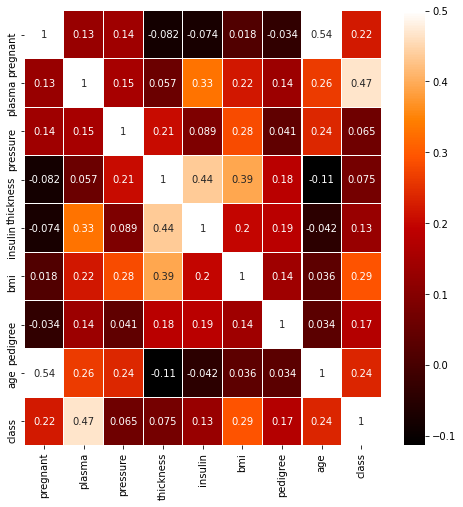

In [ ]:
import matplotlib.pyplot as plt #matplotlib는 파이썬에서 그래프를 그릴 때 가장 많이 사용되는 라이브러리
import seaborn as sns #좀 더 정교한 그래프를 그리게끔 도와주는 seaborn 라이브러리

#데이터 간의 상관관계를 그래프로 표현해 봅니다.
colormap = plt.cm.gist_heat #그래프의 색상 구성
plt.figure(figsize=(8,8)) # 그래프의 크기

#그래프의 속성을 결정, vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5,cmap=colormap, linecolor='white',annot=True)
plt.show()

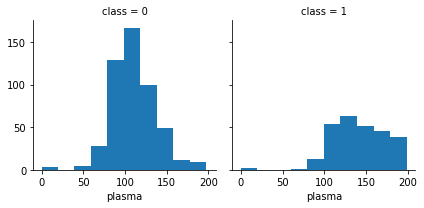

In [ ]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf
  
# seed 값 생성
np.random.seed(3)
tf.random.set_seed(3)
  
# 데이터 로드
dataset = numpy.loadtxt("/content/drive/MyDrive/test/pima-indians-diabetes.csv", delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델의 설정
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
  
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=10)
  
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Epoch 1/200
77/77 [==============================] - 1s 1ms/step - loss: 12.0693 - accuracy: 0.6273
Epoch 2/200
77/77 [==============================] - 0s 2ms/step - loss: 5.7426 - accuracy: 0.6227
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 3.2875 - accuracy: 0.5365
Epoch 4/200
77/77 [==============================] - 0s 1ms/step - loss: 1.6549 - accuracy: 0.5589
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8960 - accuracy: 0.4802
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8696 - accuracy: 0.5314
Epoch 7/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7652 - accuracy: 0.6588
Epoch 8/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7709 - accuracy: 0.6785
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.7154 - accuracy: 0.6615
Epoch 10/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.6699
Epoch 11

# 다중분류문제(irls)

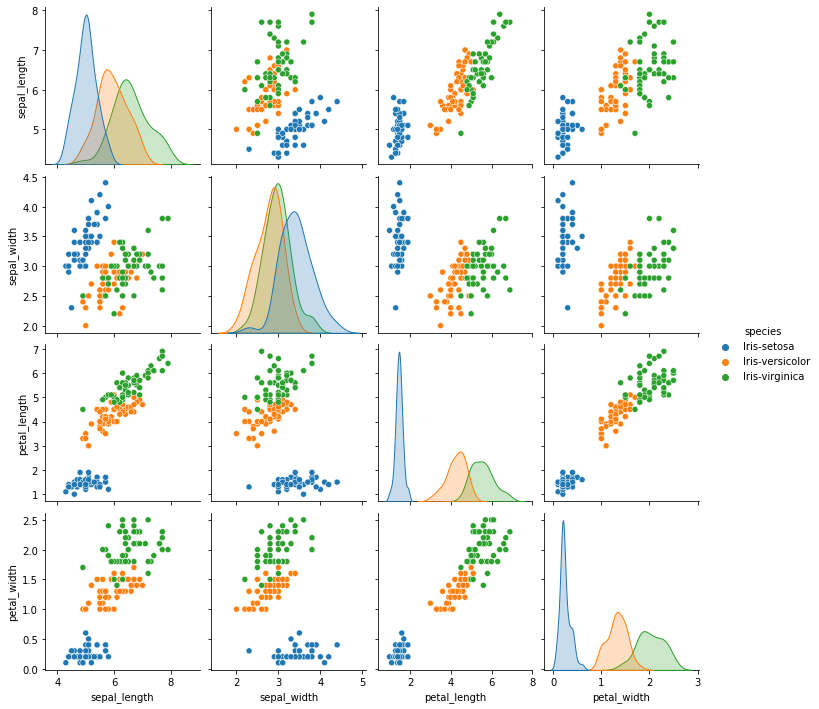

Epoch 1/50
150/150 [==============================] - 1s 998us/step - loss: 1.6167 - accuracy: 0.3221
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.9050 - accuracy: 0.4977
Epoch 3/50
150/150 [==============================] - 0s 956us/step - loss: 0.7321 - accuracy: 0.6970
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6164 - accuracy: 0.7308
Epoch 5/50
150/150 [==============================] - 0s 984us/step - loss: 0.5534 - accuracy: 0.7866
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy: 0.9213
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.9625
Epoch 8/50
150/150 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.8350
Epoch 9/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8978
Epoch 10/50
150/150 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
df = pd.read_csv('/content/drive/MyDrive/test/iris.csv', names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# 그래프로 확인
sns.pairplot(df, hue='species');
plt.show()

# 데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

# 결과 출력
print('\n Accuracy: %.4f' % (model.evaluate(X, Y_encoded)[1]))

# 과적합 피하기(overfitting)

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
 
import pandas as pd
import numpy
import tensorflow as tf
  
# seed 값 설정
seed = 0
numpy.random.seed(3)
tf.random.set_seed(3)
  
# 데이터 입력
df = pd.read_csv('/content/drive/MyDrive/test/sonar.csv', header=None)

dataset = df.values
X = dataset[:,0:60]
X = np.asarray(X).astype(np.float32) # dtype이 object인데, float로 바꿔준다
Y_obj = dataset[:,60]
  
# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 학습 셋과 테스트 셋의 구분
X_train, X_test, Y_train, Y_test =\
train_test_split(X, Y, test_size=0.3, random_state=seed)
  
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
  
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)
  
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

# 모델을 컴퓨터에 저장
model.fit(X_train, Y_train, epochs=130, batch_size=5)
model.save('my_model.h5')


Epoch 1/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.5397
Epoch 2/200
42/42 [==============================] - 0s 1ms/step - loss: 0.2340 - accuracy: 0.5915
Epoch 3/200
42/42 [==============================] - 0s 1ms/step - loss: 0.2138 - accuracy: 0.6648
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.7134
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.7470
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.7464
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.7840
Epoch 8/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.8007
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1605 - accuracy: 0.8071
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.7902
Epoch 11/

# k겹 교차 검증(k-fold cross validation)

In [69]:
from sklearn.model_selection import StratifiedKFold
# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

# 빈 accuracy 배열
accuracy = []

# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=10, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

# 결과 출력
print("\n %.f fold accuracy:" % n_fold, accuracy)

Epoch 1/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2529 - accuracy: 0.4965
Epoch 2/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2443 - accuracy: 0.5767
Epoch 3/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2299 - accuracy: 0.6699
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.7841
Epoch 5/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1925 - accuracy: 0.7593
Epoch 6/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1687 - accuracy: 0.7879
Epoch 7/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1658 - accuracy: 0.7627
Epoch 8/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1459 - accuracy: 0.8189
Epoch 9/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1540 - accuracy: 0.7907
Epoch 10/100
38/38 [==============================] - 0s 1ms/step - loss: 0.1493 - accuracy: 0.7672
Epoch 11/